# Logistic Regression

I am a newbie to data science and machine learning, and will be attempting to work my way through the Titanic: Machine Learning from Titanic dataset.

In this classification problem, the goal is to predict if a passenger survived the sinking of the Titanic or not. <br>
First, we will do some exploratory data analysis and then use our understanding in logistic regression to train the model for classification. We then deploy our model on test dataset and see how well the model does predictions.

Link for the Dataset: https://www.kaggle.com/c/titanic/data


First, let's import some libraries which are very much useful in Reading the dataset and helpful to explore our data using certain functions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Let's read our training dataset "train_titanic.csv" into "train" by using pandas library

In [2]:
train = pd.read_csv('C:/Users/ADMIN/Documents/train.csv')

## Exploratory Data Analysis - EDA
Let's overview the dataset using `info()` first!

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**<br>
So, we have 891 entries in our train dataset with column name on the traveler information along with other information such as passenger class (Pclass), Fare, Ticket Cabin etc. <br>
Notice, Age column have 714 non-null whereas Cabin have 204 non-null values. Embarked also have 889 non-null. So there is some data missing!<br> Let's do some calculation to find out the % of missing data in each column!<br>
Remember, we have a function `isnull()` in this situation!

In [4]:
pct_missing = round((train.isnull().sum())/(train.isnull().count())*100,1)
pct_missing.sort_values(ascending=False).head()

Cabin          77.1
Age            19.9
Embarked        0.2
PassengerId     0.0
Survived        0.0
dtype: float64

We have the numbers now!<br>
* `Cabin` column is missing 77.1% of its data
* `Age` column is missing 19.9% of its data
* `Embarked` column is missing 0.2% of its data

we use seaborn's heatmap method to visualization of missing data.<br>
`isnull()` return `True` for all the places where the data is missing.

<AxesSubplot:>

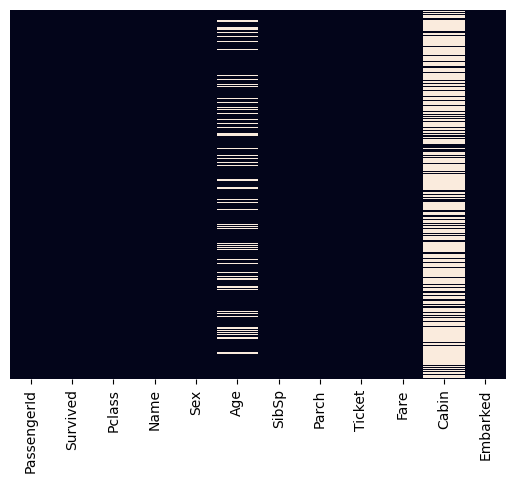

In [5]:
sns.heatmap(data=train.isnull(), yticklabels=False,cbar=False)

Notice, white are `True` which represent the missing data!<br><br>
**If we want to now more about the dataset<br>**
we can use `countplot()` to see how many survived and how many died!

<AxesSubplot:xlabel='Survived', ylabel='count'>

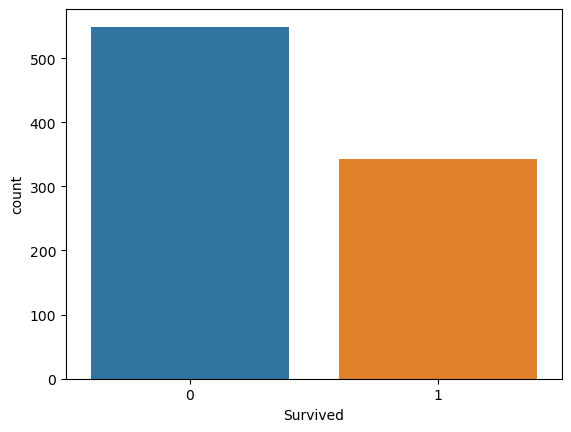

In [6]:
sns.countplot(x='Survived', data=train)

It's shows that not many passengers were survived! <br><br>
**Let's see into little deeper, pass `hue = Sex` to see the female and male ratio in survived and died passengers**

<AxesSubplot:xlabel='Survived', ylabel='count'>

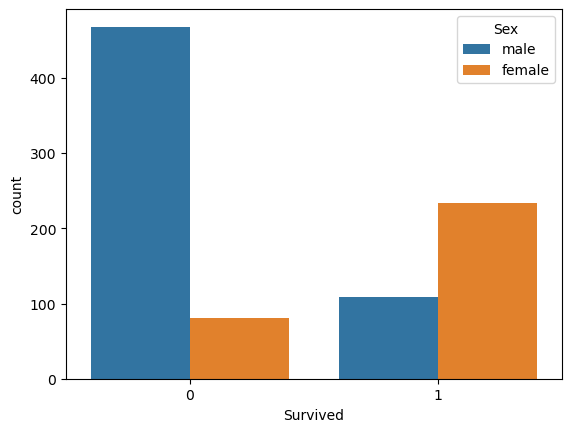

In [7]:
sns.countplot(x='Survived', hue='Sex',data=train)

The plot suggests that not many males survived whereas, most of the females survived.

**Let's see based on 'Pclass' who got survived the most**

<AxesSubplot:xlabel='Survived', ylabel='count'>

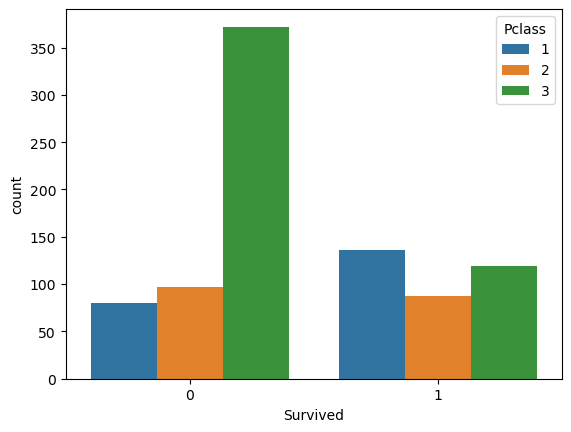

In [8]:
sns.countplot(x='Survived', hue='Pclass',data=train)

We got even better understanding, now we know that more than half of the class-1 passenger survived whereas most of the class-3 passengers died.

### Data Cleaning
We have missing data! <br>
**`Age` column is missing ~ 19.9% of its data.**<br>
The appropriate and convenient way to fix 'Age' column is by filling the missing data with mean or average value of all passengers in the column. We can do even better in this case, becasue we know that there are three passenger classes, its better to use the average age for each missing passenger for its own class. <br>
Let's use a `boxplot()` method to explore if their is any relationship in class and passenger age?

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

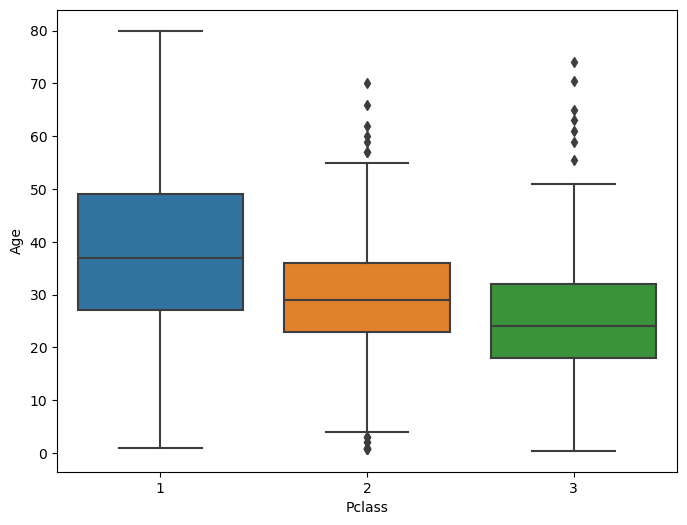

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass',y='Age',data=train)

Here, `Pclass` and `Age` are related,the older the passenger is, the higher the class he traveled in! <br>
So we can fill the missing `Age` with respect to the passenger class is the better way to fill in missing data in `Age`!<br>
If we may want to know the average age of the passenger for each class, use `groupby()` function it is usefull here!<br><br>
Let's find the average age of the passenger in each class first, we only need `Pclass` and `Age` columns

In [10]:
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


Now, we have average age for each class, let's write a custom function to fill in the missing values in `Age` columns. We will use if-else conditional statement in the function!

In [11]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [12]:
# Let's apply the function to our data
# axis = 1 becasue we want to apply this across the column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# Let's revise the 'impute_age' function and the statement above! 

<AxesSubplot:>

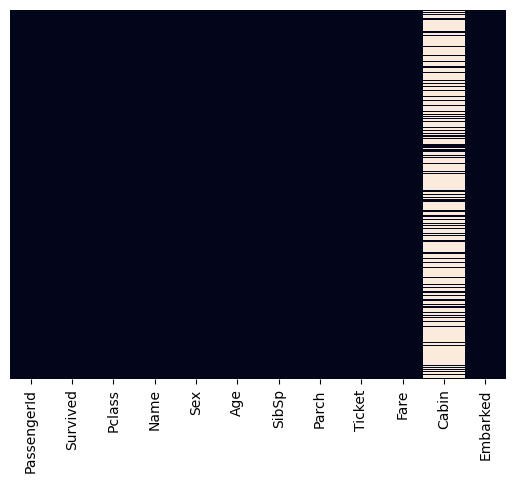

In [13]:
# Let's try to re-plot the heatmap now!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

So, we got this done, no more white color for Age means we have filled all the missing data accordingly!

In [14]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

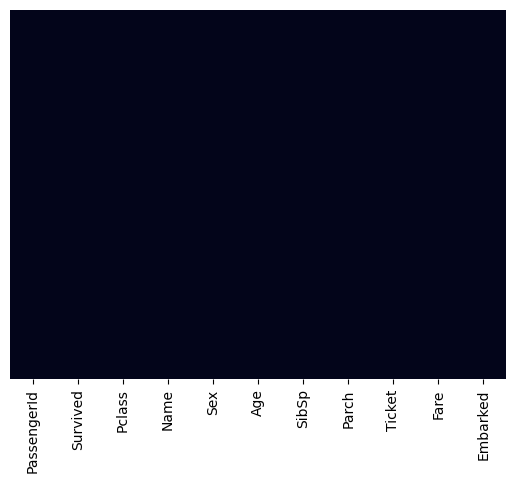

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

So, we don't have `Cabin` Column in our data now, only white color is for `Embarked` column. This is only 0.2%<br>
Let's drop any other missing value in the dataset now, this will essentially drop the row for missing `Embarked` data. We will re-plot the heatmap after this operation.

<AxesSubplot:>

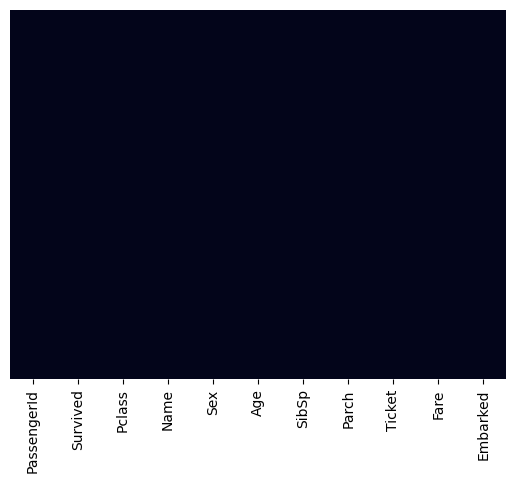

In [16]:
train.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

We don't have any missing data in our dataset now!<br>
It's time to deal with the Categorical Features now!<br><br>
### Dealing with Categorical Features
To apply Machine Learning algorithm, we need to convert categorical variable into some indicator variables. <br>
For example, in `Sex` column for female/male, we need to input 0/1 to make the Machine Learning model work. For this, we will create a new column indicating the `Sex` as 0/1 for female/male, this process is called 
***creating dummies***. This is important because the Machine Learning model will not take string variable as input to work with.<br><br>

We have an inbuilt function ['pandas.get_dummies'], we can use this function to convert easily into variables.

Let's pass the `Sex` column and see how it works!

In [17]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


So, this is what we want to input to our Machine Learning algorithm! <br>
Let's do the similar process to `Embarked` columns!

In [18]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


So, if Q is 0, S is 0, the Machine Learning algorithm can predict C is 1 because at one time, a passenger can use one port only so Q, S or C, only one can be 1/True. <br><br>
Now, we have dummies in sex and embark for our categorical variables, let's use concatenation method to add these to the train data!<br>
We will pass the list of dataframes `[train, sex, embark]` to `concat()` method and set axis = 1 as adding new columns. 

In [19]:
train = pd.concat([train,sex,embark],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


We got new columns `male, Q, S` in our dataframe as replacement columns for `Sex` and `Embarked` to input to our Machine Learning algorithm. We don't need `Sex` `PassengerId` and `Embarked` columns anymore. We will also not use `Ticket` and `Name` columns in this project, this information is not much helpful at this stage.<br>
Let's drop `Sex, Embarked, Ticket, Name, PassengerId ` columns for our dataset.

In [21]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [22]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


So, our data is ready to train our Machine Learning algorithm. <br>
We did the following steps:
* fixed the missing data issue
* created dummies for categorical features
* dealt with Multi-Collinearity issue
* dropped the columns we don't need

**Let's build and train Logistic Regression Model for our data!**


## Model Building - Logistic Regression
Our dataset is ready for building a Logistic Regression Model. We will take `train` as all of our data and split it into train and test dataset using `train_test_split()` method in `sklearn`. 

**Train Test Split**<br>
Let's pass features to X and target to y. Survived is our target column whereas all other are features!

In [23]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [24]:
# Importing required method from sklearn
from sklearn.model_selection import train_test_split

In [25]:
# Let's keep the default size and states
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Training**<br>
Let's import `LogisticRegression` from `linear_model` family in `sklearn` and create its instance!

In [26]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

In [27]:
# Training the model on our training dataset -- shift+tab for doc string
logR.fit(X_train, y_train)

LogisticRegression()

### Predictions
Out model is trained on the given dataset, default parameters are shown above.<br>
Let's get the predictions for our test dataset from trained model `logR`

In [28]:
predictions = logR.predict(X_test)

**Comparing our prediction result with the actual result of survival**

### Evaluation 
Evaluation process has its own importance, we want our model to be as good as possible in predictions. scikit-learn provides a very nice and efficient way to evaluate classification tasks using its `classification_report` module. <br>
Let's import this module and use for evaluation<br>

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



The classification report outputs the precision, recall, f1-score and support cases for each class along with their averages.<br>
It all up to us, if we don't want the classification report and interested in the confusion matrix to calculate any specific value, we can get that one as well.<br>
Let's get the pure confusion matrix.

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
# Let's pass the y_test and predictions to get the confusion_matrix
print(confusion_matrix(y_test, predictions))

[[156  28]
 [ 26  84]]


**The End for Logistic Regression**